follow the intructions to create your grade book heatmap.

enter file name of exported grade book .csv file: Grade Book Sample.csv



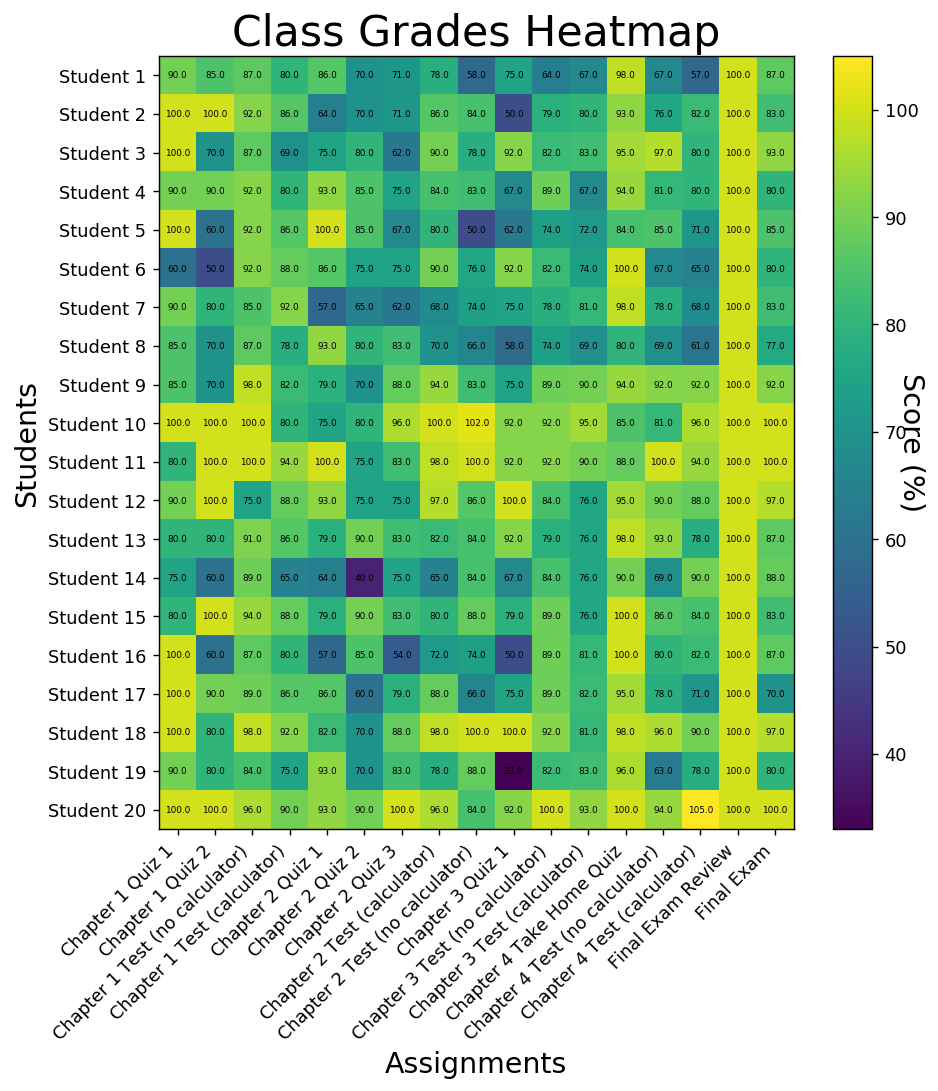

In [39]:
#Class Grades Heatmap, version 1.1
#By Greg Brown
#8/6/2019

#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#introduction
print("follow the intructions to create your grade book heatmap.")
print()

#read data from csv
filename = input("enter file name of exported grade book .csv file: ")
#title = input("enter title of graph: ")
gradebook = pd.read_csv(filename)
print()

#save assignment names
#print(gradebook)
assignments = list(gradebook.columns)
assignments.pop(0)
#print(assignments)

#format data and lists
gradebook = np.array(gradebook)
students = [gradebook[i+2][0] for i in range(len(gradebook)-2)]
totals = gradebook[1]
totals = np.delete(totals, 0)
totals = totals.astype('float64')
gradebook = np.delete(gradebook, 0, 1)
gradebook = np.delete(gradebook, [0, 1] , 0)
gradebook = gradebook.astype('float64')

#convert each entry into percent
for i in range(len(gradebook)):
    for j in range(len(totals)):
        gradebook[i][j] = round(gradebook[i][j] / totals[j] * 100)

###display raw data
#print()
#print("here are the students: ")
#print(students)
#print("here are the assignments: ")
#print(assignments)
#print()
#print("here are the total points per assignment: ")
#print(totals)
#print()
#print("here is the raw data: ")
#print(gradebook)
#print()

#create plot
fig, ax = plt.subplots(figsize = (8, 8), dpi=128)
im = ax.imshow(gradebook, aspect='auto')

#format plot
#fig.suptitle(title, fontsize=16)
ax.set_title("Class Grades Heatmap", fontsize=24)
ax.set_ylabel("Students", fontsize=16)
ax.set_yticks(range(len(students)))
ax.set_yticklabels(students)
ax.set_xlabel("Assignments", fontsize=16)
ax.set_xticks(range(len(totals)))
ax.set_xticklabels(assignments)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", )

#create colorbar
colorbar = ax.figure.colorbar(im, ax=ax)
colorbar.ax.set_ylabel("Score (%)", fontsize=16, rotation=-90)

#display % for each entry
for i in range(len(gradebook)):
    for j in range(len(totals)):
        text = ax.text(j, i, gradebook[i][j], ha="center", va="center", size=5, color="k")

#show plot
plt.show()